In [2]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import glob

%matplotlib inline

In [1]:
cd /home/ck/pythonWorkspace/proj_CEH/

/home/ck/pythonWorkspace/proj_CEH


In [3]:
# Chris info
nx = 48
ny = 15
nt = 48
start_lon = -17.5
start_lat  = 5.5

In [4]:
def readFile(bfile, nx, ny, nt, startlon, startlat):  

    full_lon = np.arange(startlon, startlon + nx)
    full_lat = np.arange(startlat, startlat + ny)
    
    base = os.path.basename(bfile)
    
    date_string = base.split('_')[2]
#     year = date_string[0:4]
#     month = date_string[4:6]
#     day = date_string[6:8]
    
    try:
        time = pd.date_range(date_string, periods=nt, freq='30min')
    except:
        print('Date not correct, return None: '+date_string)
        return None
        
    rrShape = (nx, ny, nt) 
    rrMDI = np.uint8(255) 
    rr = np.fromfile(bfile, dtype=rrMDI.dtype)

    rr.shape = rrShape
    
   # ipdb.set_trace()

    da = xr.DataArray(rr.T, coords={'lon': full_lon, 'lat': full_lat, 'time' : time}, dims=['lon', 'lat', 'time']) # lats lons numpy arrays!
    da = da.transpose()
    da = da.where(da < 200)

    return da

In [5]:
test = readFile('/home/ck/DIR/cornkle/data/Marian/cells_1deg/2005/cells_40C_20050623_546_182.gra', nx, ny, nt, start_lon, start_lat)

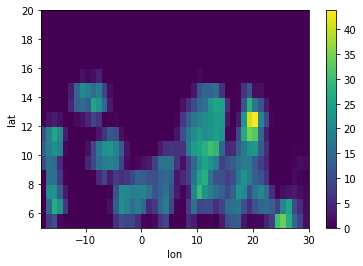

In [6]:
test.mean('time').plot()

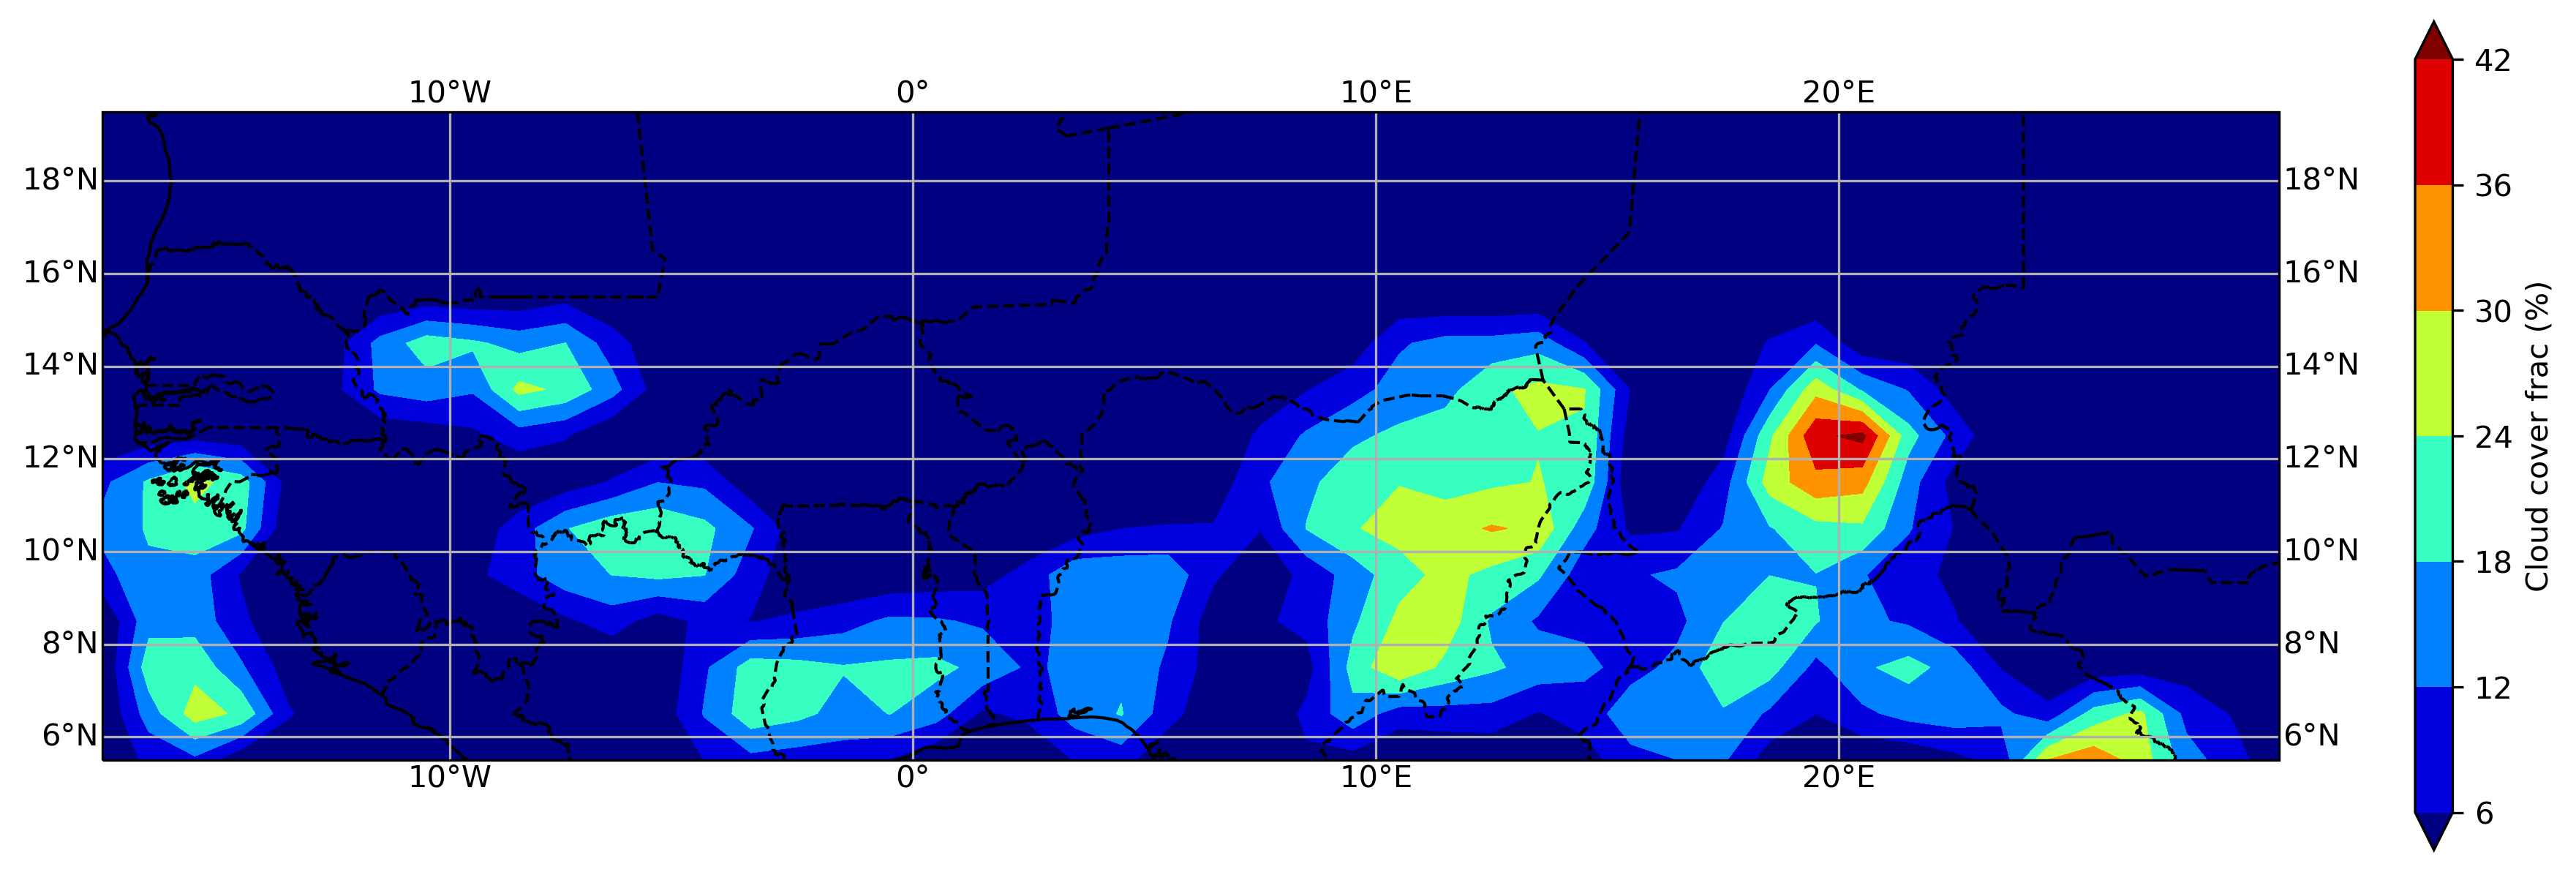

In [7]:
f = plt.figure(figsize=(16,5), dpi=300)
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(test.lon, test.lat, test.mean('time'), transform=ccrs.PlateCarree(), cmap='jet', extend='both')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
cbar = plt.colorbar()
cbar.set_label('Cloud cover frac (%)')

In [8]:
#read year 
da_list = []
file_list = glob.glob('/home/ck/DIR/cornkle/data/Marian/cells_1deg/2004/cells_40C_200408*.gra')   # 40C cells
filter_file_list = [i for i in file_list if (("daily" not in i)&("monthly" not in i))]    # don't read the "daily/monthly" files in Chris' folders


for fl in filter_file_list:
    one_da = readFile(fl, nx, ny, nt, start_lon, start_lat)
    if one_da is not None:
        da_list.append(one_da)

all_months = xr.concat(da_list, dim='time')

In [9]:
all_months

<xarray.DataArray (time: 1488, lat: 15, lon: 48)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 78.,  0.,  0.],
        [ 0.,  0.,  0., ..., 22.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 68.,  0.,  0.],
        [ 0.,  0.,  0., ..., 14.,  0.,  0.],
        [ 0.,  0.,  0., ..., 38.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * lon      (lon) float64 -17.5 -16.5 -15.5 -14.5 -13.5 ... 26.5 27.5 28.5 29.5
  * lat      (lat) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 15.5 16.5 17.5 18.5 19.5
  * time     (time) datetime64[ns] 2004-08-07 ... 2004-08-23T23:30:00

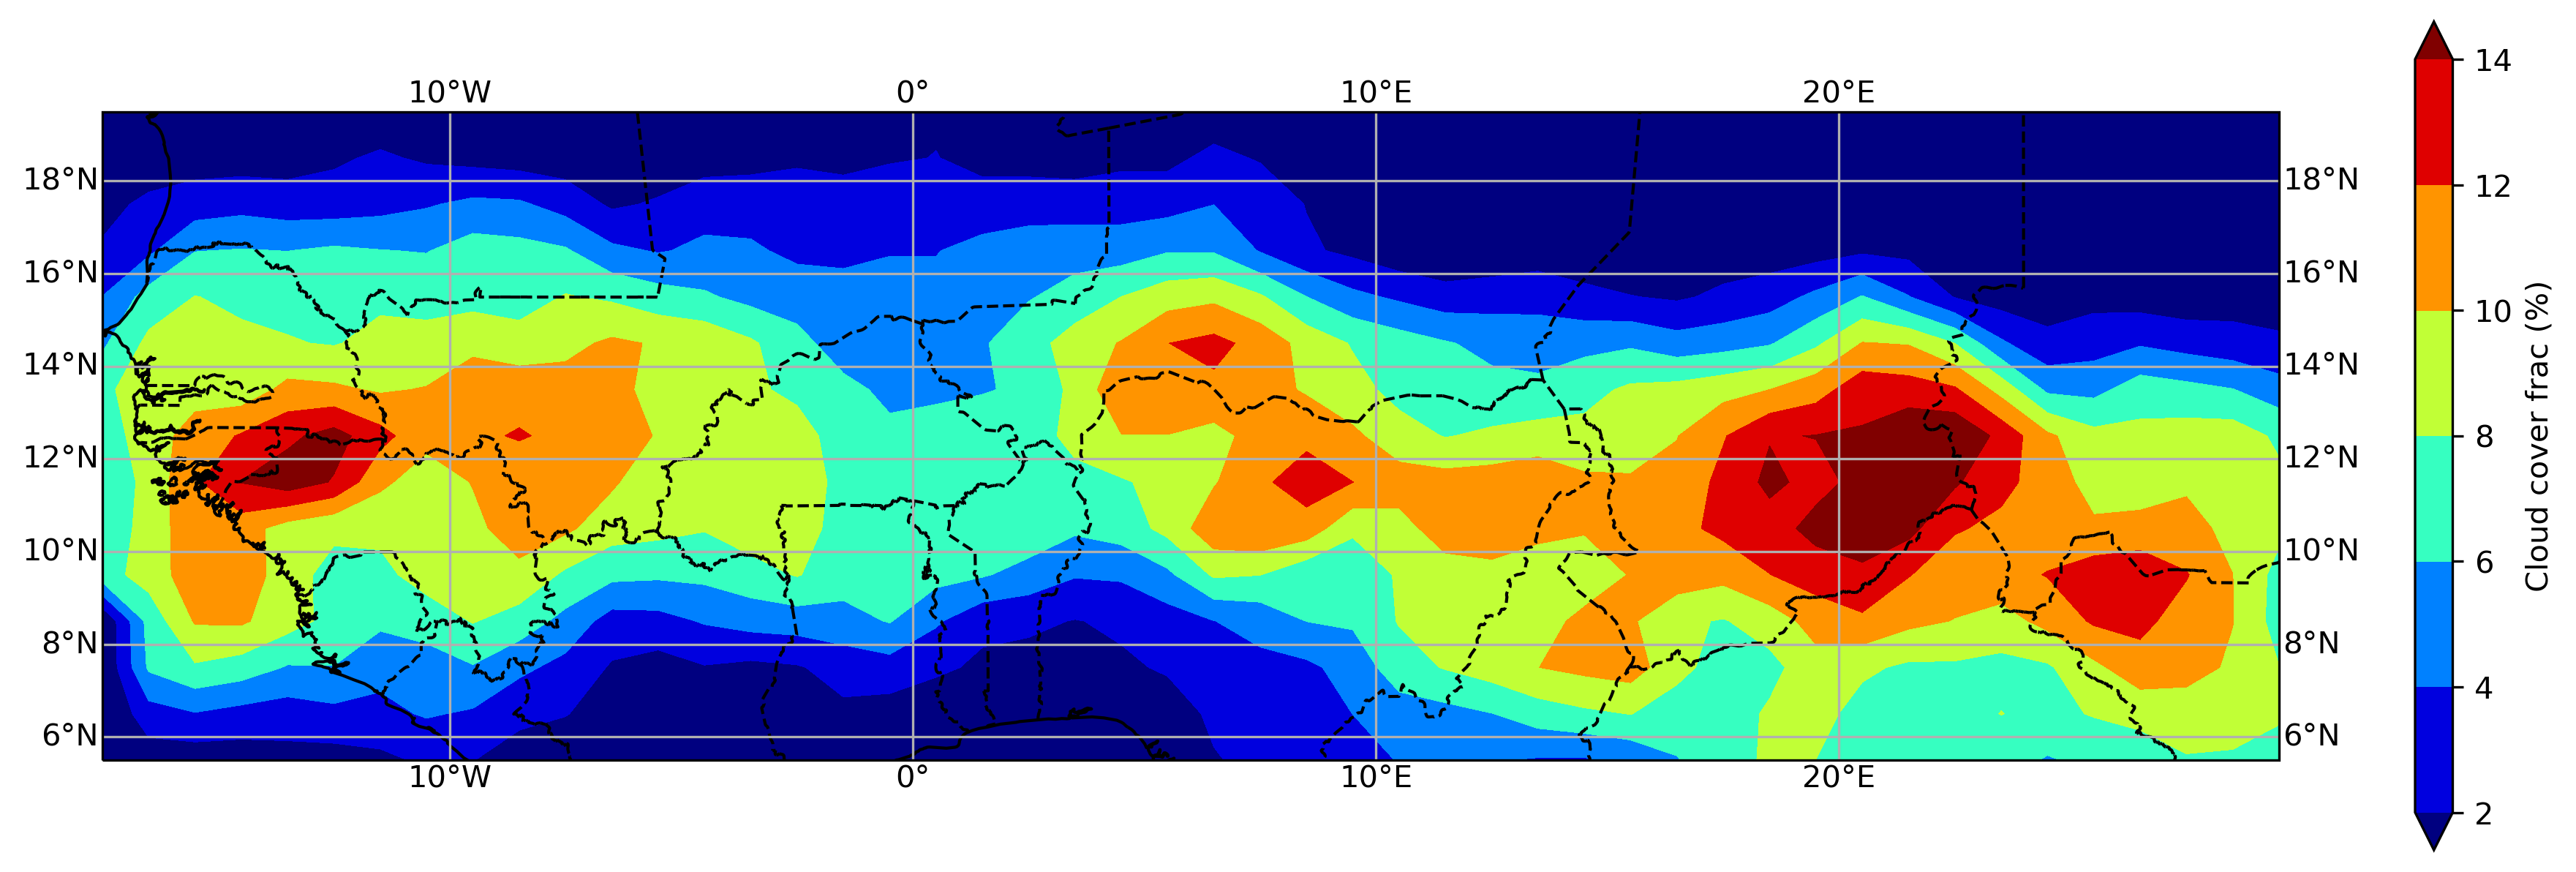

In [10]:
f = plt.figure(figsize=(16,5), dpi=300)
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(all_months.lon, all_months.lat, all_months.mean('time'), transform=ccrs.PlateCarree(), cmap='jet', extend='both')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
cbar = plt.colorbar()
cbar.set_label('Cloud cover frac (%)')